In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('states_all.csv') 

#interpolate ederek NA degerleri doldurdum

data.TOTAL_REVENUE = data.TOTAL_REVENUE.interpolate()
data.TOTAL_EXPENDITURE = data.TOTAL_EXPENDITURE.interpolate()
data.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1918.000000,1.224000e+03,1.918000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.918000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,535.000000,531.000000,532.000000,497.000000
mean,2001.947341,9.175416e+05,6.736095e+06,7.677799e+05,4.223743e+06,4.110522e+06,6.801860e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,234.797280,278.461453,218.897886,263.683325
std,9.061480,1.066514e+06,1.014935e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.034668e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,10.209002,10.111886,7.742281,6.792513
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,187.134670,232.831510,178.557612,236.379102
25%,1994.000000,2.645145e+05,2.044669e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.034229e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,229.752478,272.765806,214.741150,259.547225
50%,2002.000000,6.499335e+05,2.182828e+06,4.035480e+05,2.537754e+06,2.058996e+06,2.162550e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,237.264821,280.619538,220.442392,265.022859
75%,2010.000000,1.010532e+06,7.286372e+06,8.279320e+05,5.055548e+06,4.755293e+06,7.451784e+06,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000056,285.411348,224.005309,268.197443
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.420961,300.568235,236.773867,280.499130


# ODEV 1
Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?



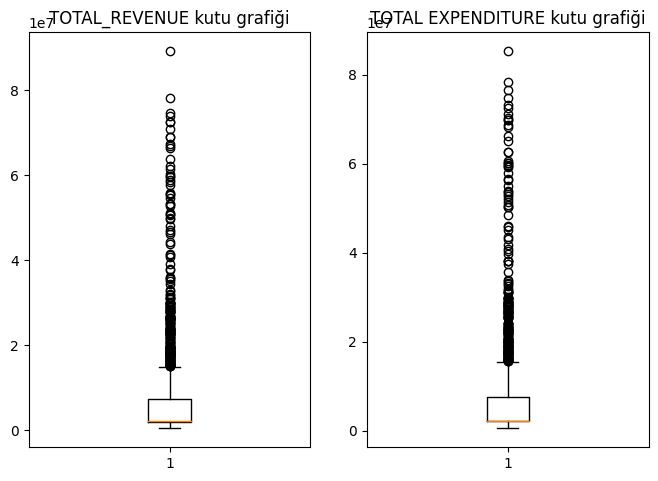

In [19]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

plt.subplot(121)
plt.boxplot(data["TOTAL_REVENUE"] )
plt.title("TOTAL_REVENUE kutu grafiği")


plt.subplot(122)
plt.boxplot(data["TOTAL_EXPENDITURE"])
plt.title("TOTAL EXPENDITURE kutu grafiği")
plt.show()

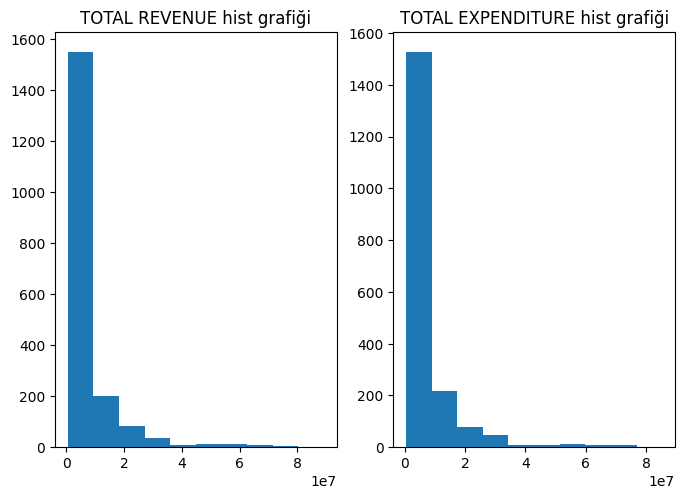

In [21]:
#histogtam ile bakalım

plt.subplot(121)
plt.hist(data["TOTAL_REVENUE"], )
plt.title("TOTAL REVENUE hist grafiği")

plt.subplot(122)
plt.hist(data["TOTAL_EXPENDITURE"], )
plt.title("TOTAL EXPENDITURE hist grafiği")

plt.show()

In [59]:
#aykırı degerlerın sayısını bulalım

def aykiri(veriler):
    q75, q25 = np.percentile(veriler, [75 ,25])
    caa = q75 - q25
    
    esik_degerler=pd.DataFrame()
    
    for esik_degeri in np.arange(1,5.5,0.5):
        min_deger = q25 - (caa*esik_degeri)
        maks_deger = q75 + (caa*esik_degeri)
    
        aykiri_deger_sayisi = len((np.where((veriler > maks_deger)| 
                                       (veriler < min_deger))[0]))
    
        esik_degerler = esik_degerler.append({'Eşik Değeri': esik_degeri,'Aykırı Değer Sayısı': aykiri_deger_sayisi}, ignore_index=True)
    
    return esik_degerler

# SOR
Esık degerı ve aykırı deger sayısı kolonunun sıralaması?

In [35]:
aykiri(data.TOTAL_REVENUE)

,Aykırı Değer Sayısı,Eşik Değeri
0,265.0,1.0
1,209.0,1.5
2,173.0,2.0
3,137.0,2.5
4,118.0,3.0
5,97.0,3.5
6,74.0,4.0
7,57.0,4.5
8,50.0,5.0


In [36]:
aykiri(data.TOTAL_EXPENDITURE)

,Aykırı Değer Sayısı,Eşik Değeri
0,254.0,1.0
1,202.0,1.5
2,164.0,2.0
3,134.0,2.5
4,110.0,3.0
5,96.0,3.5
6,67.0,4.0
7,56.0,4.5
8,50.0,5.0


# ODEV 2
Aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

In [56]:
from scipy.stats.mstats import winsorize

winsorize_TOTAL_REVENUE = winsorize(data["TOTAL_REVENUE"], (0, 0.15))

winsorize_TOTAL_EXPENDITURE = winsorize(data["TOTAL_EXPENDITURE"], (0, 0.15))
winsorize_TOTAL_REVENUE 

masked_array(data=[2678885., 1049591., 3258079., ..., 2044669., 2044669.,
                   2044669.],
             mask=False,
       fill_value=1e+20)

# SOR
BURADA AYKIRI DEGERLERIN BUYUK OLMASINDAN DOLAYI  WINSORIZE EDELIM? 10% denedim hala aykırı deger gordum  o yuzden 15 e cektım. Fakat gorsellestırmeden anlamanın yolu var mı?

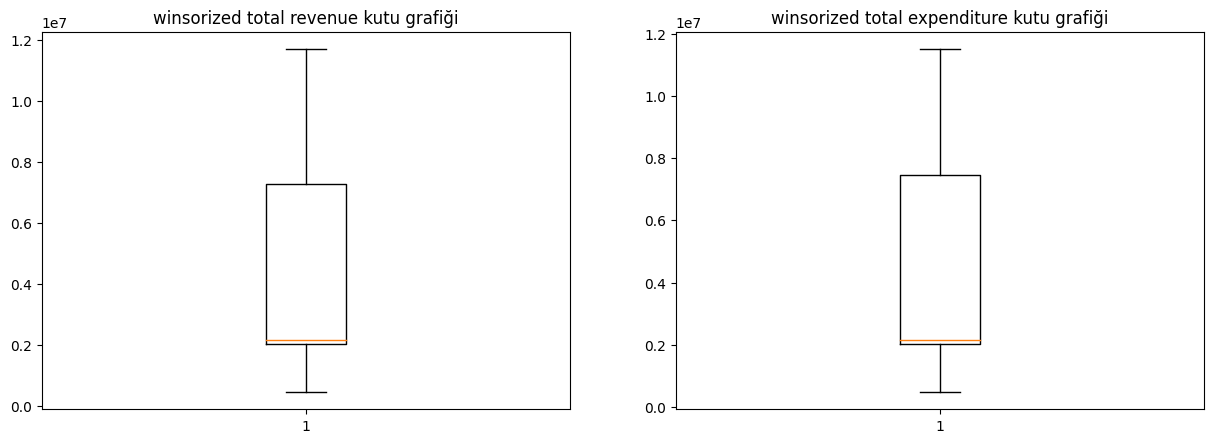

In [57]:

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.boxplot(winsorize_TOTAL_REVENUE)
plt.title("winsorized total revenue kutu grafiği")

plt.subplot(122)
plt.boxplot(winsorize_TOTAL_EXPENDITURE)
plt.title("winsorized total expenditure kutu grafiği")
plt.show()

In [58]:
print(aykiri(winsorize_TOTAL_REVENUE))
print(aykiri(winsorize_TOTAL_EXPENDITURE))

   Aykırı Değer Sayısı  Eşik Değeri
0                  0.0          1.0
1                  0.0          1.5
2                  0.0          2.0
3                  0.0          2.5
4                  0.0          3.0
5                  0.0          3.5
6                  0.0          4.0
7                  0.0          4.5
8                  0.0          5.0
   Aykırı Değer Sayısı  Eşik Değeri
0                  0.0          1.0
1                  0.0          1.5
2                  0.0          2.0
3                  0.0          2.5
4                  0.0          3.0
5                  0.0          3.5
6                  0.0          4.0
7                  0.0          4.5
8                  0.0          5.0


# ODEV3
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [60]:
butce_acigi = data.TOTAL_REVENUE - data.TOTAL_EXPENDITURE
butce_acigi

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -878807.0
          ...   
1913     10440.0
1914     10440.0
1915     10440.0
1916     10440.0
1917     10440.0
Length: 1918, dtype: float64

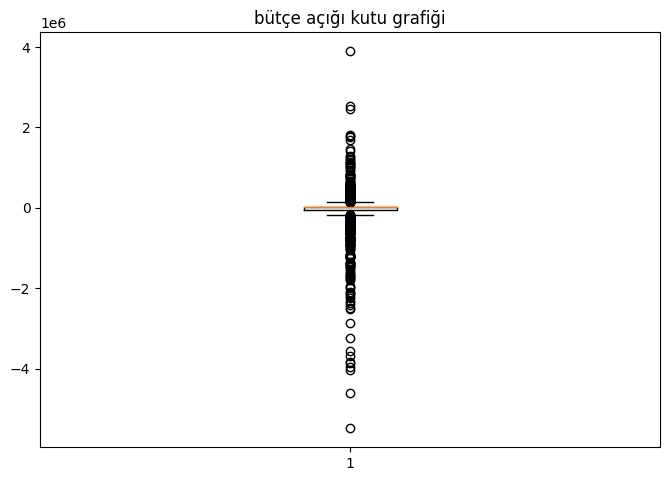

In [62]:
plt.boxplot(butce_acigi)
plt.title("bütçe açığı kutu grafiği")
plt.show()

In [63]:
aykiri(butce_acigi)


,Aykırı Değer Sayısı,Eşik Değeri
0,613.0,1.0
1,523.0,1.5
2,447.0,2.0
3,372.0,2.5
4,319.0,3.0
5,285.0,3.5
6,254.0,4.0
7,232.0,4.5
8,217.0,5.0


In [74]:
#fazla olan aykırı degerleri de temizleyelim

butce_acigi = winsorize(data['butce_acigi'], (0, 0.90))
butce_acigi



KeyError: 'butce_acigi'

# SOR
BURADA CIFT YONLU WINSORIZE MI APMAM GEREKIR EKSI DEGERLER DE VAR?

Text(0.5, 1.0, 'butce_acigi kutu grafiği')

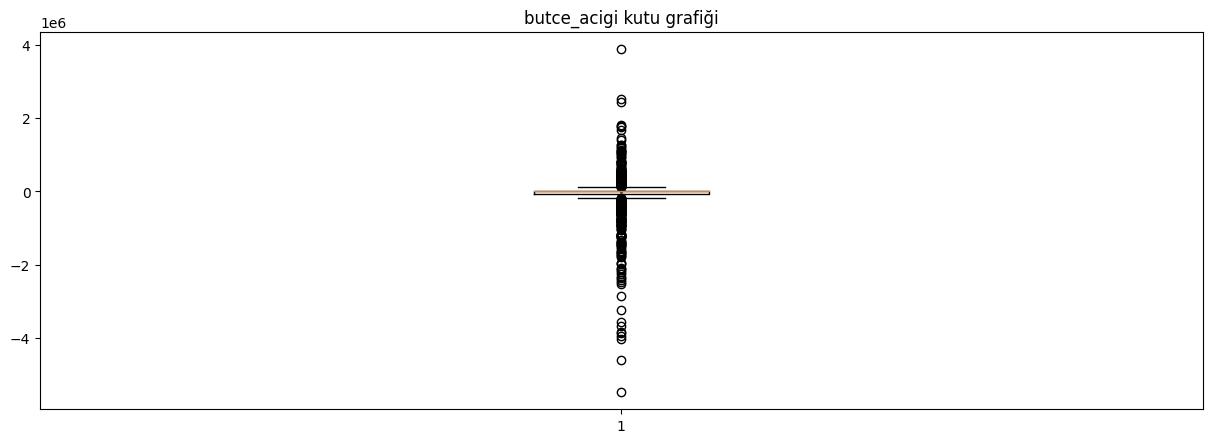

In [75]:
plt.figure(figsize = (15,5))
plt.boxplot(butce_acigi)
plt.title("butce_acigi kutu grafiği")



# ODEV 4
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

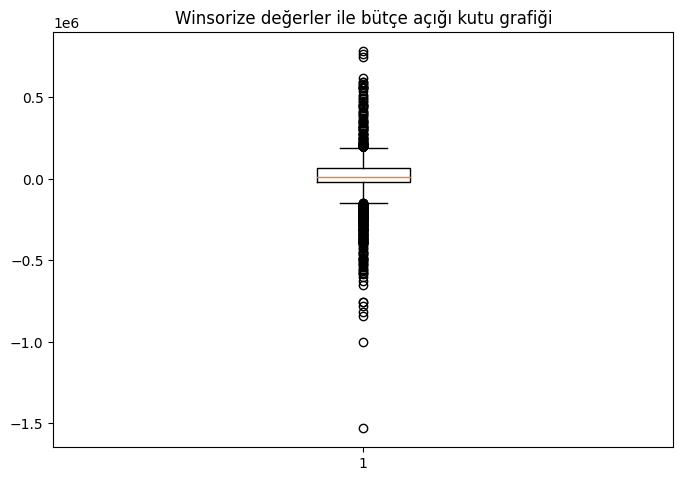

In [79]:
winsorize_butce_acigi = winsorize_TOTAL_REVENUE - winsorize_TOTAL_EXPENDITURE

plt.boxplot(winsorize_butce_acigi)
plt.title('Winsorize değerler ile bütçe açığı kutu grafiği')
plt.show()

In [80]:
aykiri(winsorize_butce_acigi)


,Aykırı Değer Sayısı,Eşik Değeri
0,660.0,1.0
1,563.0,1.5
2,220.0,2.0
3,172.0,2.5
4,132.0,3.0
5,100.0,3.5
6,79.0,4.0
7,55.0,4.5
8,47.0,5.0


In [84]:
winsorize_butce = winsorize(winsorize_butce_acigi, (0.15, 0.15))
aykiri(winsorize_butce)


,Aykırı Değer Sayısı,Eşik Değeri
0,394.0,1.0
1,360.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5
8,0.0,5.0


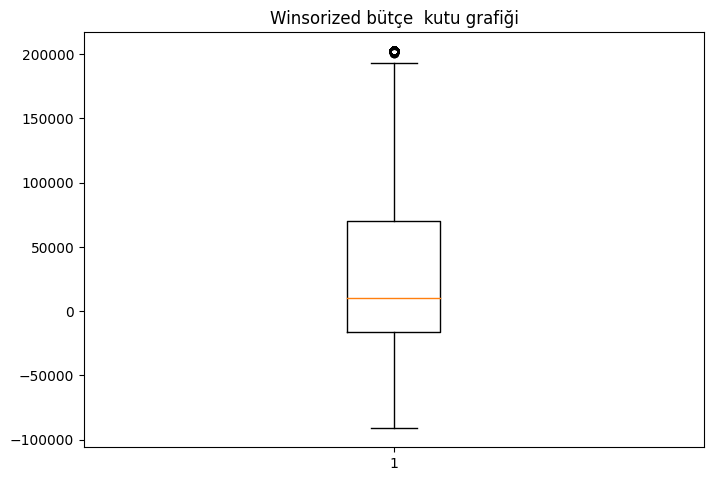

In [85]:
plt.boxplot(winsorize_butce)
plt.title('Winsorized bütçe  kutu grafiği')
plt.show()